In [23]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import ToTensor
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

import scikitplot as skplt
import torch.nn.functional as F

In [24]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [3]:
!pip install scikit-plot==0.3.7

In [25]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y))-0.5, -0.5) # ADD THIS LINE
    return ax



In [26]:
input_features = pd.read_csv("results.csv")
original_input_features = input_features[['original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_JointAverage',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_Correlation',
 'original_glcm_DifferenceAverage',
 'original_glcm_DifferenceEntropy',
 'original_glcm_DifferenceVariance',
 'original_glcm_JointEnergy',
 'original_glcm_JointEntropy',
 'original_glcm_Imc1',
 'original_glcm_Imc2',
 'original_glcm_Idm',
 'original_glcm_Idmn',
 'original_glcm_Id',
 'original_glcm_Idn',
 'original_glcm_InverseVariance',
 'original_glcm_MaximumProbability',
 'original_glcm_SumEntropy',
 'original_glcm_SumSquares',
 'original_glrlm_GrayLevelNonUniformity',
 'original_glrlm_GrayLevelNonUniformityNormalized',
 'original_glrlm_GrayLevelVariance',
 'original_glrlm_HighGrayLevelRunEmphasis',
 'original_glrlm_LongRunEmphasis',
 'original_glrlm_LongRunHighGrayLevelEmphasis',
 'original_glrlm_LongRunLowGrayLevelEmphasis',
 'original_glrlm_LowGrayLevelRunEmphasis',
 'original_glrlm_RunEntropy',
 'original_glrlm_RunLengthNonUniformity',
 'original_glrlm_RunLengthNonUniformityNormalized',
 'original_glrlm_RunPercentage',
 'original_glrlm_RunVariance',
 'original_glrlm_ShortRunEmphasis',
 'original_glrlm_ShortRunHighGrayLevelEmphasis',
 'original_glrlm_ShortRunLowGrayLevelEmphasis',
 'original_glszm_GrayLevelNonUniformity',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'original_glszm_GrayLevelVariance',
 'original_glszm_HighGrayLevelZoneEmphasis',
 'original_glszm_LargeAreaEmphasis',
 'original_glszm_LargeAreaHighGrayLevelEmphasis',
 'original_glszm_LargeAreaLowGrayLevelEmphasis',
 'original_glszm_LowGrayLevelZoneEmphasis',
 'original_glszm_SizeZoneNonUniformity',
 'original_glszm_SizeZoneNonUniformityNormalized',
 'original_glszm_SmallAreaEmphasis',
 'original_glszm_SmallAreaHighGrayLevelEmphasis',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_glszm_ZoneEntropy',
 'original_glszm_ZonePercentage',
 'original_glszm_ZoneVariance']]

In [27]:
normalized_df=(original_input_features-original_input_features.mean())/original_input_features.std()
normalized_df.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance
0,-0.666089,-0.231588,-0.062871,0.735072,0.432398,-0.426793,0.092516,0.405379,-0.615686,-0.709659,...,-0.099173,-0.400192,-0.327913,-1.585846,-1.664506,-0.606888,-0.684267,1.045467,-0.499621,-0.104014
1,-0.578095,-1.517206,-0.263500,-1.248924,-1.276448,-0.341963,-1.846960,-1.634193,-1.141716,-1.053343,...,-0.110320,0.973585,-0.501190,-0.877703,-0.821587,-1.671904,1.261333,-1.613512,-0.034525,-0.104201
2,-0.622092,-0.524080,-0.283411,0.276127,-0.076564,-0.281625,-0.462375,-0.122580,-0.619277,-0.639993,...,-0.116375,0.384715,-0.481904,0.878783,0.834547,-0.207904,0.150462,-1.122725,1.650846,-0.104464
3,-0.354726,0.007488,0.564613,0.689698,0.348010,-0.454692,0.198209,0.306012,-0.356860,-0.505306,...,-0.118485,-0.567314,0.735286,-0.734865,-0.655529,-0.333554,-0.656915,1.130329,-0.072854,-0.103984
4,1.093786,0.640184,-0.195762,-0.388872,-0.263799,-0.048176,0.235202,-0.235861,1.021571,1.115583,...,-0.106908,-0.656372,0.038311,0.220707,0.288239,0.272257,-0.714476,0.306466,-0.835561,-0.092169


Smooth                 78
Spiculated/Serrated    57
Lobulated              49
Ill-defined            33
Notched (concavity)     1
Name: Nodule Margins, dtype: int64

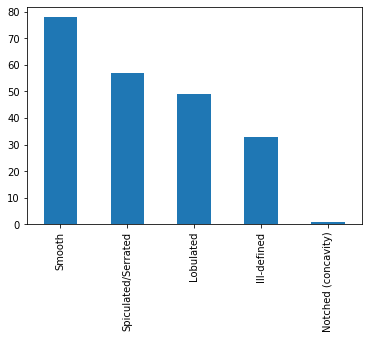

In [28]:
targets = pd.read_csv("NLST_data_processed_latest (1).csv")
targets = targets[["Nodule Consistency", "Nodule Margins"]]
Margins = targets[["Nodule Margins"]]
Margins["Nodule Margins"].value_counts().plot(kind='bar')
Margins["Nodule Margins"].value_counts()

In [29]:
targets.loc[targets["Nodule Consistency"] != "Solid", "Nodule Consistency"] = "Not Solid"
targets.loc[targets["Nodule Margins"] != "Smooth", "Nodule Margins"] = "Not Smooth"
targets["Nodule Consistency"] = targets["Nodule Consistency"].map(lambda x: 1.0 if x == "Solid" else 0.0)
targets["Nodule Margins"] = targets["Nodule Margins"].map(lambda x: 1.0 if x == "Smooth" else 0.0)

In [30]:
features = normalized_df
target = targets['Nodule Margins']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .30, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
sel_ = SelectFromModel(LogisticRegression(C=1, 
                                         penalty = 'l1', 
                                         solver = 'liblinear', 
                                         random_state = 10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=10,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [32]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False])

In [33]:
selected_features = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_features

Index(['original_firstorder_Minimum',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared',
       'original_glcm_ClusterProminence', 'original_glcm_Contrast',
       'original_glcm_DifferenceVariance', 'original_glcm_JointEnergy',
       'original_glcm_JointEntropy', 'original_glcm_Imc2',
       'original_glcm_Idmn', 'original_glcm_InverseVariance',
       'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_ShortRunEmphasis',
       'original_glrlm_ShortRunLowGrayLevelEmphasis',
       'original_glszm_GrayLevelNonUniformityNormalized',
       'original_glszm_SmallAreaEmphasis'],
      dtype='object')

In [34]:
selected_normalized_df = normalized_df[selected_features]
selected_normalized_df.head()

,original_firstorder_Minimum,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_glcm_ClusterProminence,original_glcm_Contrast,original_glcm_DifferenceVariance,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Imc2,original_glcm_Idmn,original_glcm_InverseVariance,original_glrlm_RunLengthNonUniformity,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_SmallAreaEmphasis
0,-0.492945,0.420000,0.602464,0.323509,-0.427946,-0.417508,-0.620929,1.080775,0.399810,0.701142,-0.004953,-0.207931,0.170018,0.023481,-0.264364,-1.664506
1,0.485717,-1.431802,0.992885,-1.046474,-1.111175,-1.446756,0.116763,-1.016158,0.663698,-0.862886,0.200907,-0.383302,0.383992,0.922393,1.132313,-0.821587
2,-0.216617,-0.246286,0.553756,-0.320361,0.722873,0.102117,0.026544,-1.007224,1.119402,-1.303497,-1.138765,-0.390142,1.021946,0.983241,-0.097235,0.834547
3,-0.377808,0.317212,0.312022,0.119457,-0.199378,-0.227866,-0.682482,1.476013,-0.809747,0.549244,-0.307123,0.485562,0.301579,-0.561465,-0.249920,-0.655529
4,0.727504,-0.173105,-1.098424,-0.558358,-0.528156,-0.160376,0.101165,0.022727,-0.999787,0.577664,0.843456,-0.036081,-0.871677,-0.743245,-0.115735,0.288239


In [35]:
#5 Fold Cross-validate
kf = StratifiedKFold(5, shuffle=True, random_state=42)

In [36]:
x = selected_normalized_df.values
y = target.values
x = np.array(x)
y = np.array(y)

In [37]:
x

array([[-0.49294507,  0.41999955,  0.60246413, ...,  0.02348128,
        -0.26436382, -1.66450555],
       [ 0.48571681, -1.43180157,  0.99288453, ...,  0.92239342,
         1.13231301, -0.82158713],
       [-0.21661701, -0.24628606,  0.55375649, ...,  0.98324129,
        -0.09723542,  0.83454686],
       ...,
       [ 0.57782616,  0.20825487, -0.69014507, ..., -0.34369585,
        -0.17672475,  0.27193785],
       [-1.54068897,  1.09791946,  1.02437975, ..., -0.14422997,
        -0.53395603,  0.36634464],
       [-0.02088464, -0.26822216,  0.36976167, ..., -0.38774783,
        -0.3198388 , -1.13297141]])

In [38]:
y

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.])

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print('Using {} device'.format(device))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16, 512),
            nn.ReLU(),
            nn.Linear(512, 250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.Sigmoid(),
            nn.Linear(100, 2),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits



Using cuda device


In [40]:
oos_y = []
oos_pred = []
fold = 0

x = torch.tensor(selected_normalized_df.values, dtype=torch.float32)
y = torch.tensor(targets['Nodule Margins'].values, dtype=torch.long)

for train, test in kf.split(x, target):
    fold += 1
    print(f"Fold #{fold}")
    
    model = NeuralNetwork().to(device)
#     print(model)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    
    x_train = x[train]
    x_test = x[test]
    
    y_train = y[train]
    y_test = y[test]

    x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)
    # Training loop
    EPOCHS = 50
    epoch = 0
   

    while epoch < EPOCHS:
        epoch += 1
        model.train()
        optimizer.zero_grad()
        output = model(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        # Evaluate validation loss
        model.eval()
        with torch.no_grad():
            y_val = model(x_test)
            val_loss = criterion(y_val, y_test)

    # Prediction
    with torch.no_grad():
        y_val = model(x_test)
        ##softmax
        output = F.softmax(y_val, dim=1)
        _, pred = torch.max(output, 1)
    oos_y.append(y_test.cpu().numpy())
    oos_pred.append(pred.cpu().numpy())

    print(
        f"Epoch {epoch}/{EPOCHS}, Validation Loss: " f"{val_loss.item()}"
    )

    # Measure this fold's accuracy
    score = metrics.accuracy_score(y_test.cpu().numpy(), pred.cpu().numpy())
    print(f"Fold accuracy: {score}")
    auc = metrics.roc_auc_score(y_test.cpu().numpy(), pred.cpu().numpy())
    print(f"Fold AUC: {auc}")

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)

# print(oos_y)
# print(oos_pred)

Fold #1
Epoch 50/50, Validation Loss: 0.5593345165252686
Fold accuracy: 0.75
Fold AUC: 0.7232142857142857
Fold #2
Epoch 50/50, Validation Loss: 0.7282089591026306
Fold accuracy: 0.6818181818181818
Fold AUC: 0.6428571428571429
Fold #3
Epoch 50/50, Validation Loss: 0.546738862991333
Fold accuracy: 0.75
Fold AUC: 0.7232142857142857
Fold #4
Epoch 50/50, Validation Loss: 0.8023266196250916
Fold accuracy: 0.7906976744186046
Fold AUC: 0.7773809523809524
Fold #5
Epoch 50/50, Validation Loss: 0.7637313008308411
Fold accuracy: 0.7209302325581395
Fold AUC: 0.7083333333333334


# Evaluation

In [41]:

score = metrics.accuracy_score(oos_y, oos_pred)
print(f"Final accuracy: {score}")
auc = metrics.roc_auc_score(oos_y, oos_pred)
print(f"Final AUC: {auc}")
classification_report = metrics.classification_report(oos_y, oos_pred)
print(classification_report)

Final accuracy: 0.7385321100917431
Final AUC: 0.7141025641025641
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       140
           1       0.64      0.63      0.63        78

    accuracy                           0.74       218
   macro avg       0.72      0.71      0.71       218
weighted avg       0.74      0.74      0.74       218



Confusion matrix, without normalization
[[110  30]
 [ 28  50]]


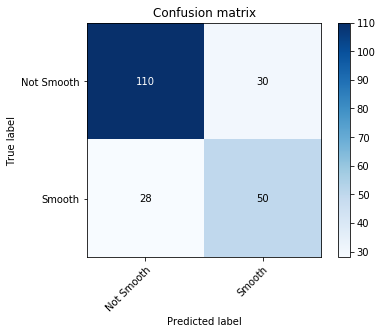

In [22]:
#compute the confusion matrix.
cm = metrics.confusion_matrix(oos_y, oos_pred)
class_names = np.array(['Not Smooth','Smooth'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(oos_y, oos_pred, classes=class_names,
                      title='Confusion matrix')


plt.show()

In [55]:
torch.save(model.state_dict(), "MLP_consistency.pth")
print("Saved PyTorch Model State to MLP_consistency.pth")

Saved PyTorch Model State to MLP_consistency.pth
